#           Predicting The Severity Of An Accident

###### By Kerman Sanjuan

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will predict the severity of an accident. Specifically, this report will be targeted to governs and organization interested on improving  **Road sequirity** in **United States**.

There's a bunch of data, so we will try to analyze and use the most relevant. 

At the end of the project we should be able to predict in certain way the severity and be usefull to the world :)

## Data <a name="data"></a>

In [485]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msg

In [486]:
df = pd.read_csv('US_Accidents_June20-1-1.csv')

Here we load the data, credits to the creator : Moosavi, Sobhan,Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath from “A Coun-trywide Traffic Accident Dataset.”,

In [487]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [488]:
df.shape

(175687, 49)

As we see, the dataset contains 49 different features and we have almost 200 thousand data samples. By the way, we have a bunch of categorical data, so we will get rid of it.



The order of droping data will be this:

    1. Not relevant data
    2. No enough data (Too  many  NaN cases)

In [489]:
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().sum().sort_values(ascending = False))
print('\nUnique values :  \n',df.nunique())



Features :
     : ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : ID                            0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                         

In [490]:
df = df*1

In [491]:
df.corr()['Severity'].sort_values()

Traffic_Signal      -0.277551
Crossing            -0.195213
Stop                -0.096342
Start_Lng           -0.085889
Number              -0.073511
Station             -0.066251
Start_Lat           -0.055591
Amenity             -0.047348
Humidity(%)         -0.025909
Give_Way            -0.024363
Pressure(in)        -0.014988
No_Exit             -0.009798
Traffic_Calming     -0.008633
Bump                -0.007223
Roundabout          -0.006339
Wind_Speed(mph)     -0.004427
Visibility(mi)       0.000229
Railway              0.010263
Temperature(F)       0.029670
Distance(mi)         0.033782
Precipitation(in)    0.047695
Wind_Chill(F)        0.079608
Junction             0.104282
TMC                  0.132160
Severity             1.000000
End_Lat                   NaN
End_Lng                   NaN
Turning_Loop              NaN
Name: Severity, dtype: float64

So, know we know all the feature types, we will delete now the values with no relevance.

In [492]:
df.drop(['ID','Pressure(in)','Wind_Direction','Timezone','Country','Airport_Code','Astronomical_Twilight','Nautical_Twilight','State','Zipcode','Street','Side','City','County'],axis = 1,inplace = True)

I dont like much this way of visualization, so we will draw the missing values

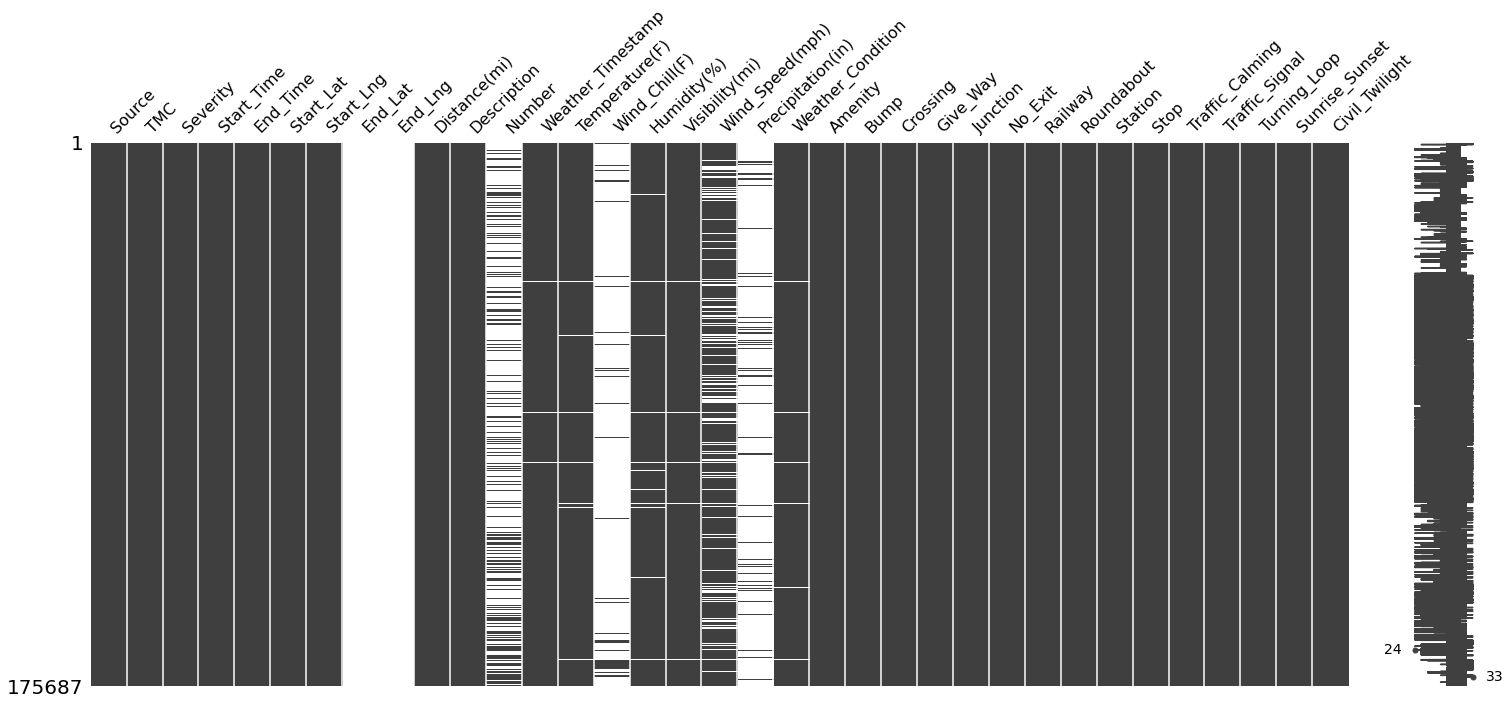

In [493]:
msg.matrix(df)

In [494]:
df.isnull().sum().sort_values(ascending = True)

Source                    0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Description               0
Distance(mi)              0
Traffic_Signal            0
Turning_Loop              0
Start_Lng                 0
Start_Lat                 0
End_Time                  0
Start_Time                0
Severity                  0
TMC                       0
Amenity                   0
Bump                      0
Civil_Twilight           14
Sunrise_Sunset           14
Weather_Timestamp      1529
Weather_Condition      2593
Temperature(F)         2756
Visibility(mi)         2842
Humidity(%)            3157
Wind_Speed(mph)       35985
Number               125678
Precipitation(in)    161740
Wind_Chill(F)        164162
End_Lng              175687
End_Lat              175687
dtype: int64

We will drop the columns with most missing values


In [495]:
df.drop(['Start_Time','End_Time','Start_Lat','Start_Lng','Description','Weather_Timestamp','End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis = 1,inplace = True)

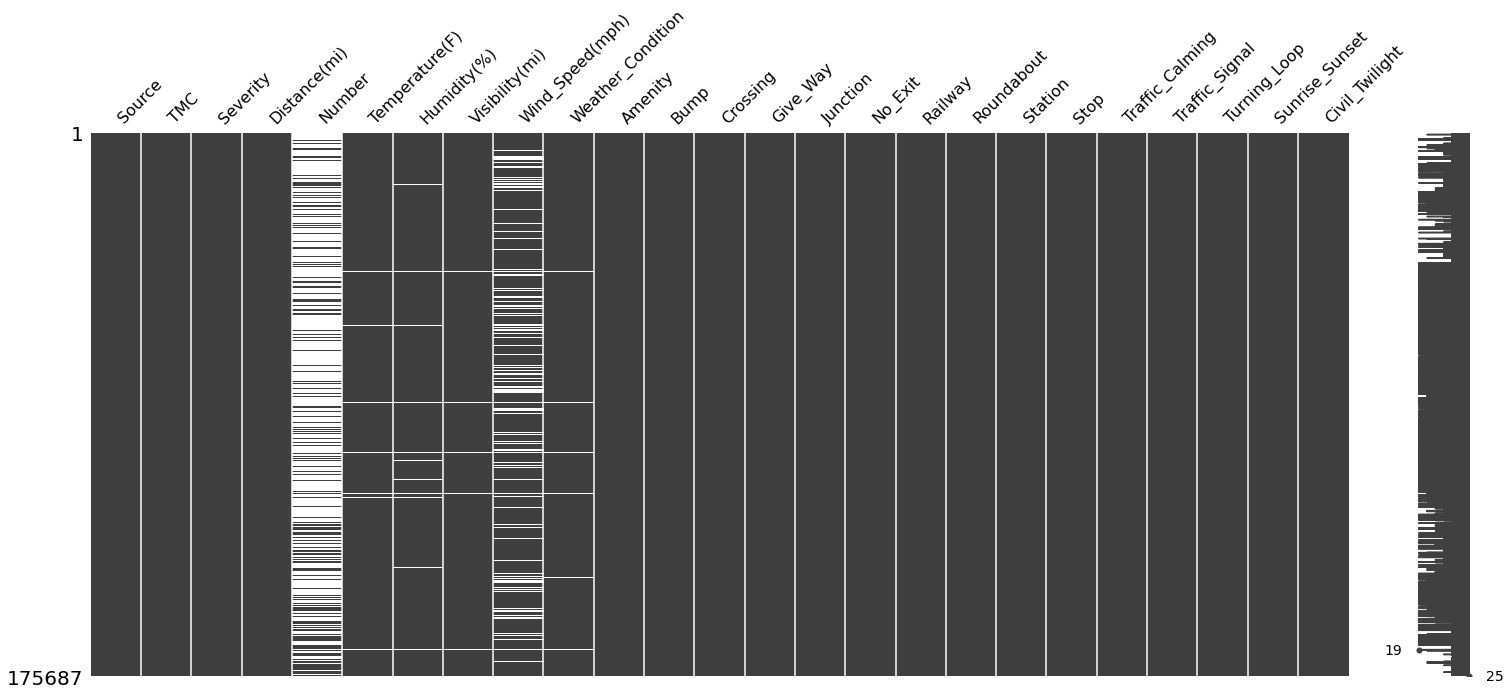

In [496]:
msg.matrix(df)

In [497]:
df.shape

(175687, 25)

Now, we will get rid of the most irrelevant categorical values

In [498]:
df.select_dtypes(exclude=['int','float']).columns

Index(['Source', 'Severity', 'Weather_Condition', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

In [499]:
df

,Source,TMC,Severity,Distance(mi),Number,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,MapQuest,201.0,3,0.01,NaN,36.9,91.0,10.0,NaN,Light Rain,...,0,0,0,0,0,0,0,0,Night,Night
1,MapQuest,201.0,2,0.01,2584.0,37.9,100.0,10.0,NaN,Light Rain,...,0,0,0,0,0,0,0,0,Night,Night
2,MapQuest,201.0,2,0.01,NaN,36.0,100.0,10.0,3.5,Overcast,...,0,0,0,0,0,0,1,0,Night,Night
3,MapQuest,201.0,3,0.01,NaN,35.1,96.0,9.0,4.6,Mostly Cloudy,...,0,0,0,0,0,0,0,0,Night,Day
4,MapQuest,201.0,2,0.01,NaN,36.0,89.0,6.0,3.5,Mostly Cloudy,...,0,0,0,0,0,0,1,0,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175682,MapQuest,201.0,2,0.00,NaN,82.0,65.0,10.0,8.1,Partly Cloudy,...,0,0,0,0,0,0,0,0,Day,Day
175683,MapQuest,201.0,2,0.00,NaN,73.0,90.0,10.0,9.2,Mostly Cloudy,...,0,0,0,0,0,0,1,0,Day,Day
175684,MapQuest,229.0,2,0.00,2404.0,75.0,82.0,10.0,4.6,Mostly Cloudy,...,0,0,0,0,0,0,1,0,Day,Day
175685,MapQuest,229.0,2,0.00,NaN,73.9,85.0,10.0,4.6,Mostly Cloudy,...,0,0,0,0,0,0,0,0,Day,Day


In [500]:
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())


Features :
     : ['Source', 'TMC', 'Severity', 'Distance(mi)', 'Number', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight']

Missing values    : 173039

Unique values :  
 Source                   2
TMC                     21
Severity                 4
Distance(mi)           561
Number               11154
Temperature(F)         626
Humidity(%)             97
Visibility(mi)          37
Wind_Speed(mph)         68
Weather_Condition       51
Amenity                  2
Bump                     2
Crossing                 2
Give_Way                 2
Junction                 2
No_Exit                  2
Railway                  2
Roundabout               2
Station                  2
Stop                     2
Traffic_Calming          2
Traffic_Signal      

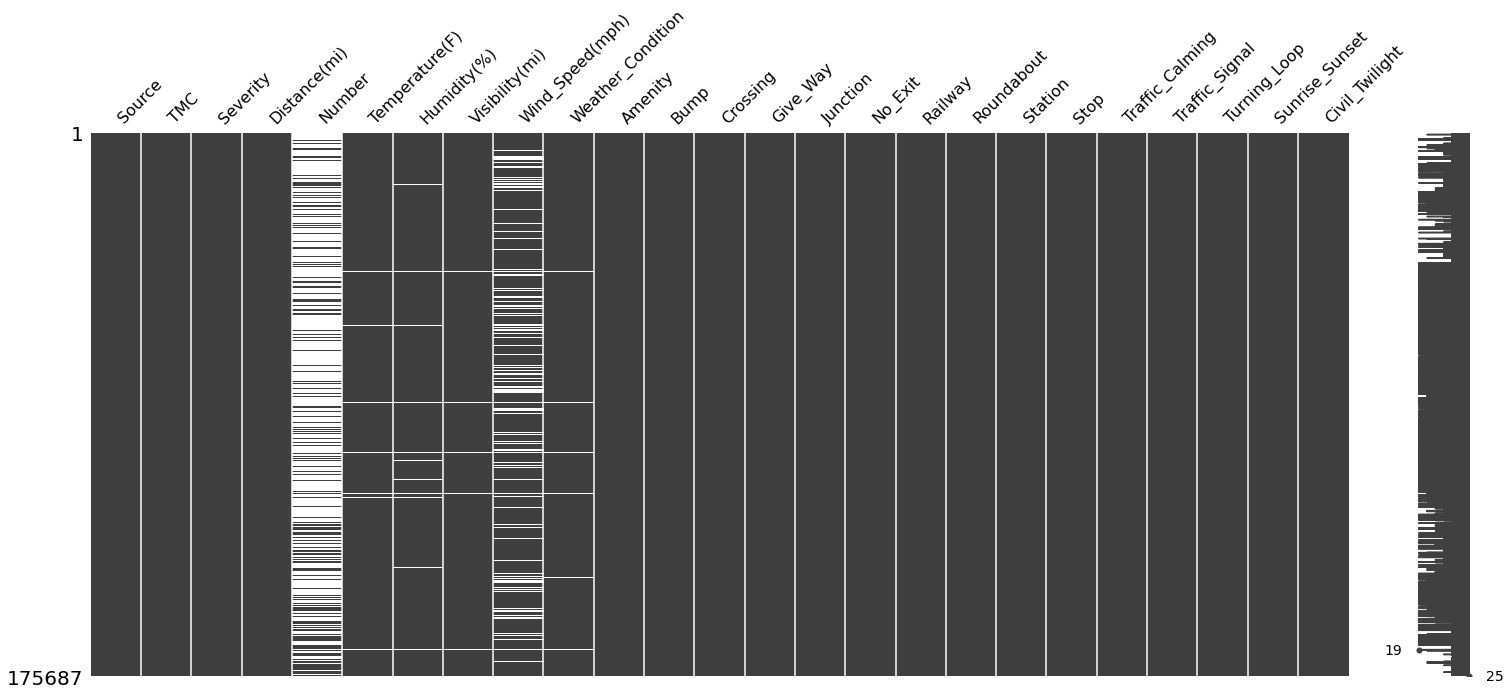

In [501]:
msg.matrix(df)

In [502]:
df.head()

,Source,TMC,Severity,Distance(mi),Number,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,MapQuest,201.0,3,0.01,NaN,36.9,91.0,10.0,NaN,Light Rain,...,0,0,0,0,0,0,0,0,Night,Night
1,MapQuest,201.0,2,0.01,2584.0,37.9,100.0,10.0,NaN,Light Rain,...,0,0,0,0,0,0,0,0,Night,Night
2,MapQuest,201.0,2,0.01,NaN,36.0,100.0,10.0,3.5,Overcast,...,0,0,0,0,0,0,1,0,Night,Night
3,MapQuest,201.0,3,0.01,NaN,35.1,96.0,9.0,4.6,Mostly Cloudy,...,0,0,0,0,0,0,0,0,Night,Day
4,MapQuest,201.0,2,0.01,NaN,36.0,89.0,6.0,3.5,Mostly Cloudy,...,0,0,0,0,0,0,1,0,Day,Day


In [503]:
df.select_dtypes(exclude=['int','float','bool']).columns

Index(['Source', 'Severity', 'Weather_Condition', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

In [504]:
df.drop('Source',axis = 1,inplace= True)

In [505]:
df

,TMC,Severity,Distance(mi),Number,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,201.0,3,0.01,NaN,36.9,91.0,10.0,NaN,Light Rain,0,...,0,0,0,0,0,0,0,0,Night,Night
1,201.0,2,0.01,2584.0,37.9,100.0,10.0,NaN,Light Rain,0,...,0,0,0,0,0,0,0,0,Night,Night
2,201.0,2,0.01,NaN,36.0,100.0,10.0,3.5,Overcast,0,...,0,0,0,0,0,0,1,0,Night,Night
3,201.0,3,0.01,NaN,35.1,96.0,9.0,4.6,Mostly Cloudy,0,...,0,0,0,0,0,0,0,0,Night,Day
4,201.0,2,0.01,NaN,36.0,89.0,6.0,3.5,Mostly Cloudy,0,...,0,0,0,0,0,0,1,0,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175682,201.0,2,0.00,NaN,82.0,65.0,10.0,8.1,Partly Cloudy,0,...,0,0,0,0,0,0,0,0,Day,Day
175683,201.0,2,0.00,NaN,73.0,90.0,10.0,9.2,Mostly Cloudy,0,...,0,0,0,0,0,0,1,0,Day,Day
175684,229.0,2,0.00,2404.0,75.0,82.0,10.0,4.6,Mostly Cloudy,0,...,0,0,0,0,0,0,1,0,Day,Day
175685,229.0,2,0.00,NaN,73.9,85.0,10.0,4.6,Mostly Cloudy,0,...,0,0,0,0,0,0,0,0,Day,Day


In [506]:
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())


Features :
     : ['TMC', 'Severity', 'Distance(mi)', 'Number', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight']

Missing values    : 173039

Unique values :  
 TMC                     21
Severity                 4
Distance(mi)           561
Number               11154
Temperature(F)         626
Humidity(%)             97
Visibility(mi)          37
Wind_Speed(mph)         68
Weather_Condition       51
Amenity                  2
Bump                     2
Crossing                 2
Give_Way                 2
Junction                 2
No_Exit                  2
Railway                  2
Roundabout               2
Station                  2
Stop                     2
Traffic_Calming          2
Traffic_Signal           2
Turning_Loop             1
Sun

In [507]:
print(df['Weather_Condition'].unique())

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow']


In [508]:
df.isnull().sum().sort_values(ascending = True)

TMC                       0
Turning_Loop              0
Traffic_Signal            0
Traffic_Calming           0
Stop                      0
Station                   0
Roundabout                0
Railway                   0
No_Exit                   0
Junction                  0
Give_Way                  0
Crossing                  0
Bump                      0
Amenity                   0
Distance(mi)              0
Severity                  0
Sunrise_Sunset           14
Civil_Twilight           14
Weather_Condition      2593
Temperature(F)         2756
Visibility(mi)         2842
Humidity(%)            3157
Wind_Speed(mph)       35985
Number               125678
dtype: int64

In [509]:
df.shape

(175687, 24)

In [510]:
df.select_dtypes(include='object').fillna(\
 ...: df.select_dtypes(include='object').mode().iloc[0])
df.select_dtypes(include='float').fillna(df.select_dtypes(include='float').mean().iloc[0],inplace=True)

/Users/kerman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [511]:
df.isnull().sum().sort_values(ascending = True)

TMC                       0
Turning_Loop              0
Traffic_Signal            0
Traffic_Calming           0
Stop                      0
Station                   0
Roundabout                0
Railway                   0
No_Exit                   0
Junction                  0
Give_Way                  0
Crossing                  0
Bump                      0
Amenity                   0
Distance(mi)              0
Severity                  0
Sunrise_Sunset           14
Civil_Twilight           14
Weather_Condition      2593
Temperature(F)         2756
Visibility(mi)         2842
Humidity(%)            3157
Wind_Speed(mph)       35985
Number               125678
dtype: int64

In [512]:
df['Wind_Speed(mph)'].replace(np.nan, df['Wind_Speed(mph)'].mean (),inplace = True)
df['Humidity(%)'].replace(np.nan, df['Humidity(%)'].mean (),inplace = True)
df['Visibility(mi)'].replace(np.nan, df['Visibility(mi)'].mean (),inplace = True)
df['Visibility(mi)'].replace(np.nan, df['Visibility(mi)'].mean (),inplace = True)
df['Temperature(F)'].replace(np.nan, df['Temperature(F)'].mean (),inplace = True)

In [513]:
df.isnull().sum().sort_values(ascending = True)

TMC                       0
Turning_Loop              0
Traffic_Signal            0
Traffic_Calming           0
Stop                      0
Station                   0
Roundabout                0
Railway                   0
No_Exit                   0
Junction                  0
Give_Way                  0
Crossing                  0
Bump                      0
Amenity                   0
Wind_Speed(mph)           0
Visibility(mi)            0
Humidity(%)               0
Temperature(F)            0
Distance(mi)              0
Severity                  0
Sunrise_Sunset           14
Civil_Twilight           14
Weather_Condition      2593
Number               125678
dtype: int64

In [514]:
df.isnull().sum().sort_values(ascending = True)

TMC                       0
Turning_Loop              0
Traffic_Signal            0
Traffic_Calming           0
Stop                      0
Station                   0
Roundabout                0
Railway                   0
No_Exit                   0
Junction                  0
Give_Way                  0
Crossing                  0
Bump                      0
Amenity                   0
Wind_Speed(mph)           0
Visibility(mi)            0
Humidity(%)               0
Temperature(F)            0
Distance(mi)              0
Severity                  0
Sunrise_Sunset           14
Civil_Twilight           14
Weather_Condition      2593
Number               125678
dtype: int64

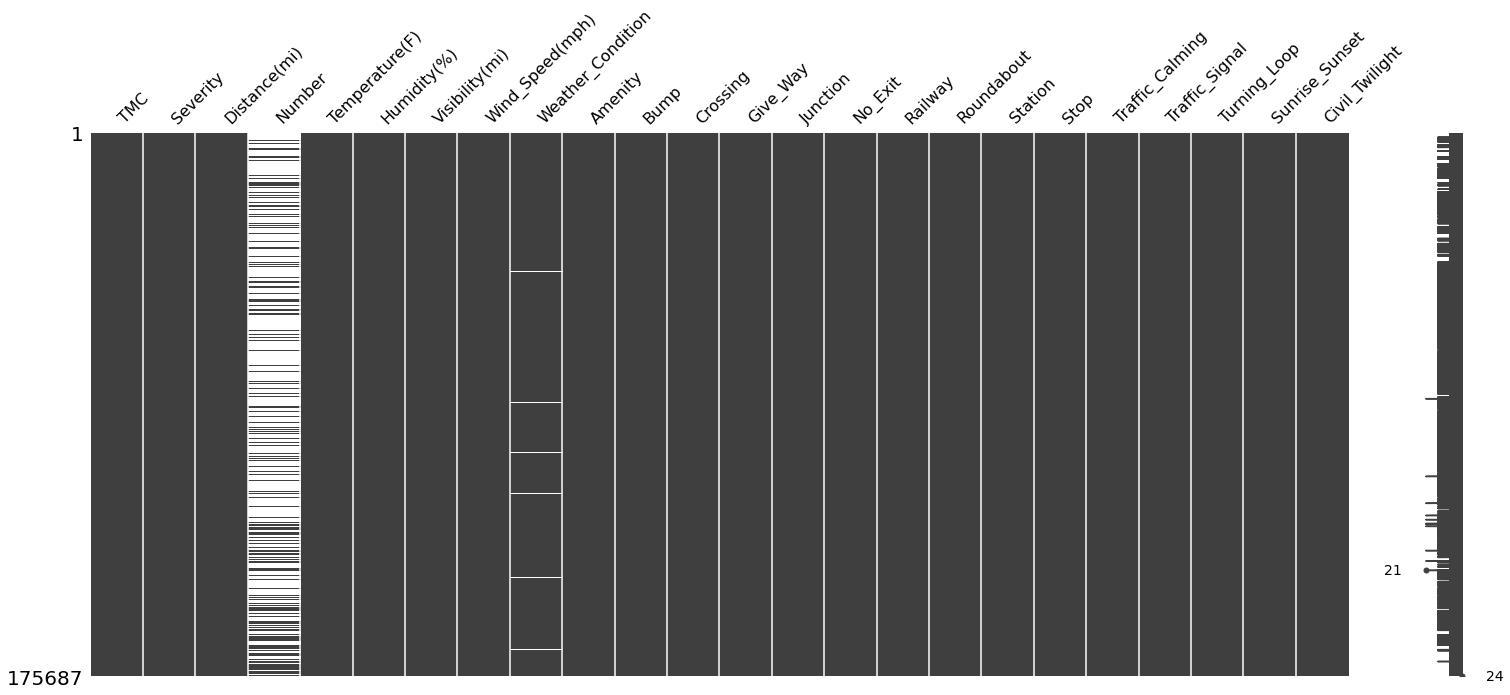

In [515]:
msg.matrix(df)

In [516]:
df.shape

(175687, 24)

In [517]:
df.describe()

,TMC,Severity,Distance(mi),Number,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Amenity,Bump,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
count,175687.000000,175687.000000,175687.000000,50009.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,...,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.0
mean,209.170052,2.416804,0.030264,6777.826271,67.548494,63.117058,9.347344,8.331181,0.008174,0.000165,...,0.001144,0.072436,0.000564,0.009984,0.000057,0.027207,0.015875,0.000262,0.167850,0.0
std,20.643348,0.496058,0.521301,8471.395247,14.316323,21.720834,1.863401,5.823619,0.090038,0.012847,...,0.033805,0.259209,0.023732,0.099419,0.007544,0.162688,0.124992,0.016179,0.373734,0.0
min,200.000000,1.000000,0.000000,1.000000,-13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,201.000000,2.000000,0.000000,1200.000000,59.000000,49.000000,10.000000,5.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,201.000000,2.000000,0.000000,3639.000000,68.000000,65.000000,10.000000,8.331181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,201.000000,3.000000,0.010000,9098.000000,77.000000,80.000000,10.000000,9.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,406.000000,4.000000,80.890000,80100.000000,114.100000,100.000000,80.000000,822.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [518]:
df.isnull().sum().sort_values(ascending = True)

TMC                       0
Turning_Loop              0
Traffic_Signal            0
Traffic_Calming           0
Stop                      0
Station                   0
Roundabout                0
Railway                   0
No_Exit                   0
Junction                  0
Give_Way                  0
Crossing                  0
Bump                      0
Amenity                   0
Wind_Speed(mph)           0
Visibility(mi)            0
Humidity(%)               0
Temperature(F)            0
Distance(mi)              0
Severity                  0
Sunrise_Sunset           14
Civil_Twilight           14
Weather_Condition      2593
Number               125678
dtype: int64

In [519]:
df = df.fillna(df['Civil_Twilight'].value_counts().index[0])
df = df.fillna(df['Sunrise_Sunset'].value_counts().index[0])
df = pd.concat([df,pd.get_dummies(df['Civil_Twilight'], prefix='Civil_Twilight',dummy_na=True)],axis=1).drop(['Civil_Twilight'],axis=1)
df = pd.concat([df,pd.get_dummies(df['Sunrise_Sunset'], prefix='Sunrise_Sunset',dummy_na=True)],axis=1).drop(['Sunrise_Sunset'],axis=1)


In [520]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [521]:
df.shape

(175687, 28)

## Methodology <a name="methodology"></a>

In [522]:
df.select_dtypes(include='object').fillna(\
 ...: df.select_dtypes(include='object').mode().iloc[0])
df.select_dtypes(include='float').fillna(df.select_dtypes(include='float').mean().iloc[0],inplace=True)
df = pd.concat([df,pd.get_dummies(df['Weather_Condition'], prefix='Weather_Condition',dummy_na=True)],axis=1).drop(['Weather_Condition'],axis=1)

/Users/kerman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [523]:
df = df.fillna(df['Civil_Twilight'].value_counts().index[0])
df = df.fillna(df['Sunrise_Sunset'].value_counts().index[0])
df = pd.concat([df,pd.get_dummies(df['Civil_Twilight'], prefix='Civil_Twilight',dummy_na=True)],axis=1).drop(['Civil_Twilight'],axis=1)
df = pd.concat([df,pd.get_dummies(df['Sunrise_Sunset'], prefix='Sunrise_Sunset',dummy_na=True)],axis=1).drop(['Sunrise_Sunset'],axis=1)

KeyError: 'Civil_Twilight'

### Vamos a implementar un arbol a ver que se cuenta

In [ ]:
print(df.corr()['Severity'].sort_values())

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.loc[:, df.columns != 'Severity'].values

In [ ]:
y = df['Severity']

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)


In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 12)
drugTree # it shows the default parameters

In [ ]:

drugTree.fit(X_trainset,y_trainset)

In [ ]:
predTree = drugTree.predict(X_testset)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score


In [ ]:
for i in range (1,25):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    drugTree.fit(X_trainset,y_trainset)
    predTree = drugTree.predict(X_testset)
    print("DecisionTrees's Accuracy: with ",i, metrics.accuracy_score(y_testset, predTree))
    print("DecisionTrees's Accuracy: with ",i, metrics.r2_score(y_testset, predTree))
    print("DecisionTrees's Accuracy: with ",i, metrics.f1_score(y_testset, predTree,average='weighted'))